In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [100]:
# loading the data from csv file to a Pandas DataFrame
insurance_dataset = pd.read_csv('C:/Users/ASUS/Desktop/ML Project/archive/insurance.csv')

In [101]:
# first 5 rows of the dataframe
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19.0,female,27.900,0,yes,southwest,16884.92400
1,18.0,male,33.770,1,no,southeast,1725.55230
2,28.0,male,33.000,3,no,southeast,4449.46200
3,33.0,male,22.705,0,no,northwest,21984.47061
4,32.0,male,28.880,0,no,northwest,3866.85520


In [102]:
# number of rows and columns
insurance_dataset.shape

(1338, 7)

In [103]:
 #getting some informations about the dataset
insurance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1336 non-null   float64
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 73.3+ KB


In [104]:
# checking for missing (values)(EDA)
insurance_dataset.isnull().sum()

age         2
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [105]:
insurance_dataset['age'] = insurance_dataset['age'].fillna(insurance_dataset['age'].mean())


In [106]:
insurance_dataset.isnull().sum()


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [107]:
# statistical Measures of the dataset
insurance_dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.208832,30.663397,1.094918,13270.422265
std,14.049883,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


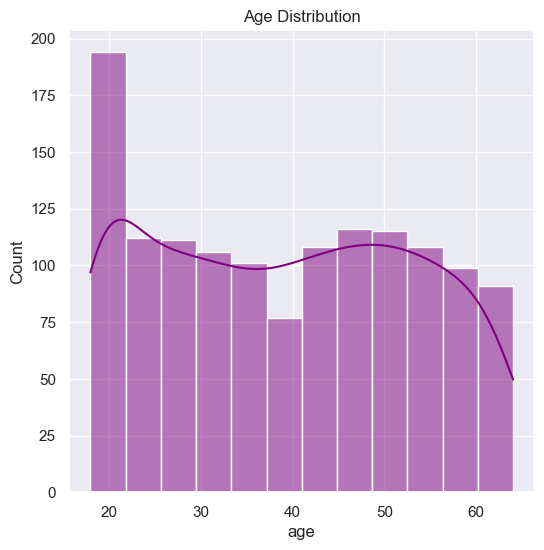

In [108]:
# distribution of age value
sns.set()
plt.figure(figsize=(6,6))
sns.histplot(insurance_dataset['age'],kde=True,color='purple')
plt.title('Age Distribution')
plt.show()

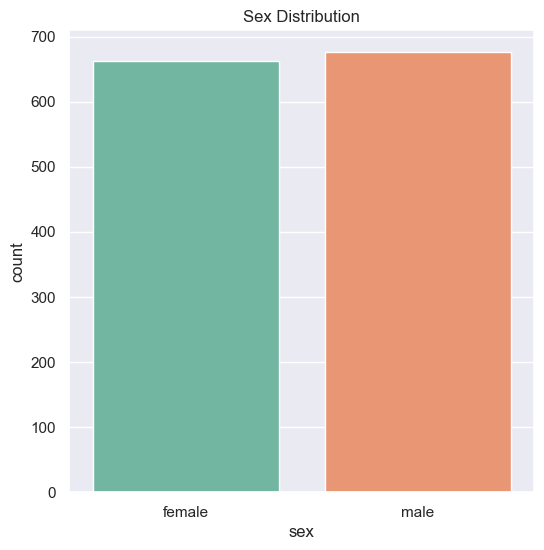

In [109]:
# Gender column
plt.figure(figsize=(6,6))
sns.countplot(x='sex', hue='sex',data=insurance_dataset, palette='Set2')  
plt.title('Sex Distribution')
plt.show()

In [110]:
insurance_dataset['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

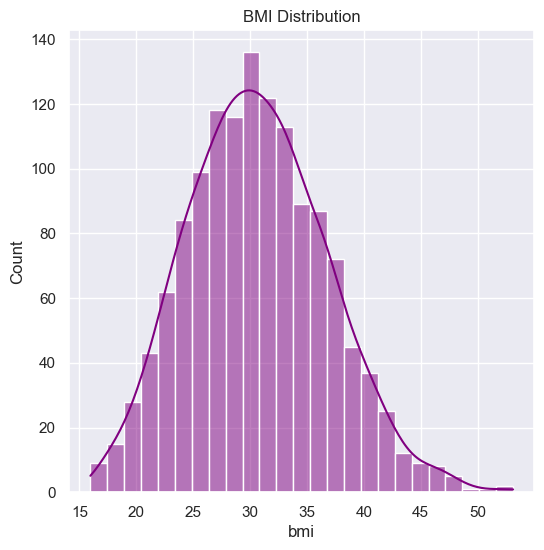

In [111]:
plt.figure(figsize=(6,6))
sns.histplot(insurance_dataset['bmi'], kde=True, color='purple')
plt.title('BMI Distribution')
plt.show()


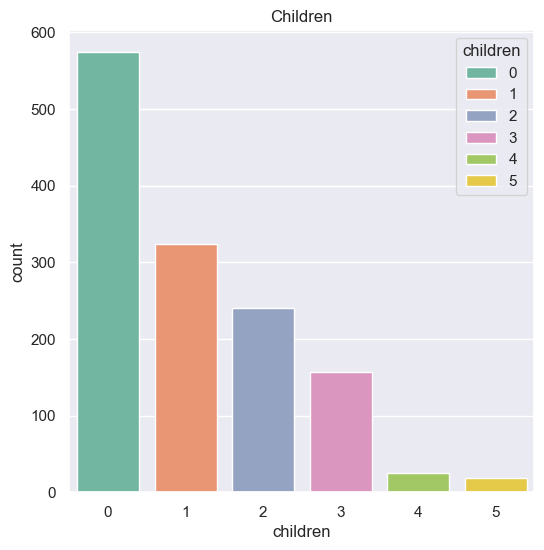

In [112]:
# children column
plt.figure(figsize=(6,6))
sns.countplot(x='children', data=insurance_dataset,palette='Set2',hue='children')
plt.title('Children')
plt.show()

In [113]:
insurance_dataset['children'].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

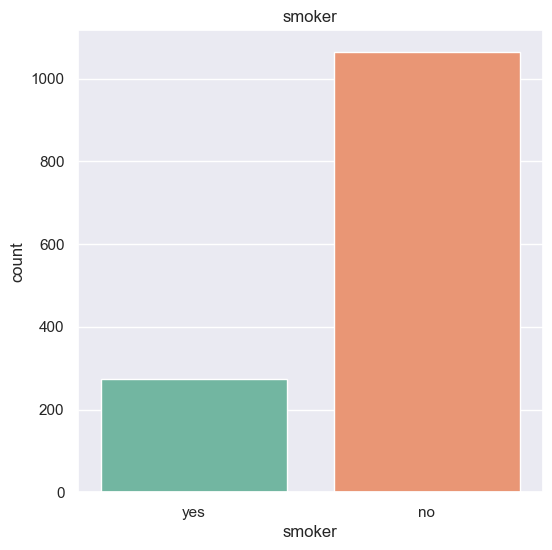

In [114]:
# smoker column
plt.figure(figsize=(6,6))
sns.countplot(x='smoker', hue='smoker',data=insurance_dataset,palette='Set2')
plt.title('smoker')
plt.show()

In [115]:
insurance_dataset['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

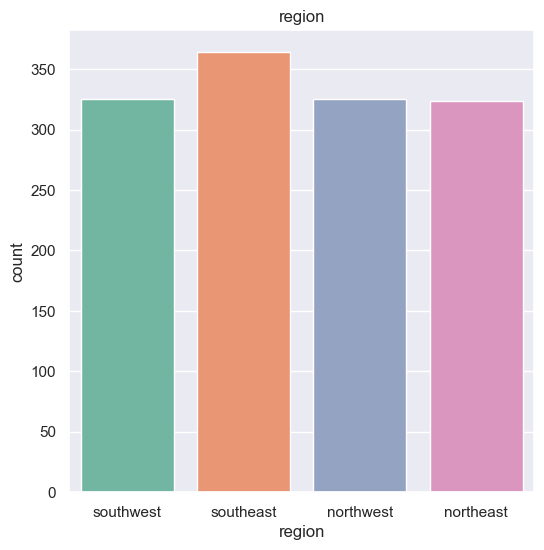

In [116]:
# region column
plt.figure(figsize=(6,6))
sns.countplot(x='region',hue='region' ,data=insurance_dataset,palette='Set2')
plt.title('region')
plt.show()

In [117]:
insurance_dataset['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

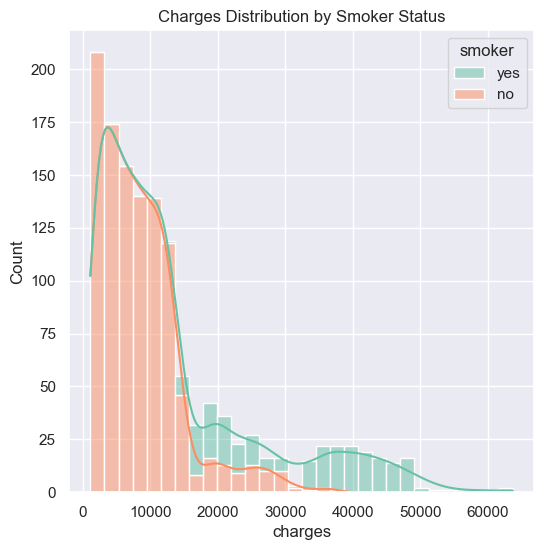

In [118]:
# distribution of charges value
plt.figure(figsize=(6,6))
sns.histplot(data=insurance_dataset, x='charges', hue='smoker', multiple='stack', palette='Set2', kde=True)
plt.title('Charges Distribution by Smoker Status')
plt.show()


In [119]:
# Encoding 'sex' column
insurance_dataset['sex'] = insurance_dataset['sex'].map({'male': 0, 'female': 1})

# Encoding 'smoker' column
insurance_dataset['smoker'] = insurance_dataset['smoker'].map({'yes': 0, 'no': 1})

# Encoding 'region' column
insurance_dataset['region'] = insurance_dataset['region'].map({'southeast': 0, 'southwest': 1, 'northeast': 2, 'northwest': 3})


In [120]:
X = insurance_dataset.drop(columns='charges', axis=1)
Y = insurance_dataset['charges']

In [121]:

print(X.isnull().sum())



age         0
sex         0
bmi         0
children    0
smoker      0
region      0
dtype: int64


In [122]:
print(X)

       age  sex     bmi  children  smoker  region
0     19.0    1  27.900         0       0       1
1     18.0    0  33.770         1       1       0
2     28.0    0  33.000         3       1       0
3     33.0    0  22.705         0       1       3
4     32.0    0  28.880         0       1       3
...    ...  ...     ...       ...     ...     ...
1333  50.0    0  30.970         3       1       3
1334  18.0    1  31.920         0       1       2
1335  18.0    1  36.850         0       1       0
1336  21.0    1  25.800         0       1       1
1337  61.0    1  29.070         0       0       3

[1338 rows x 6 columns]


In [123]:
print(Y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


Splitting the data into Training data & Testing Data


In [124]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [125]:
print(X.shape, X_train.shape, X_test.shape)

(1338, 6) (1070, 6) (268, 6)


Model Training and Linear Regression


In [126]:
# loading the Linear Regression model
regressor = LinearRegression()

In [127]:
regressor.fit(X_train, Y_train)

LinearRegression()

Model Evaluation 

In [128]:
# prediction on training data
training_data_prediction =regressor.predict(X_train)

In [129]:
# R squared value
r2_train = metrics.r2_score(Y_train, training_data_prediction)
print('R squared vale : ', r2_train)

R squared vale :  0.7515184130348177


In [130]:
# prediction on test data
test_data_prediction =regressor.predict(X_test)

In [131]:
# R squared value
r2_test = metrics.r2_score(Y_test, test_data_prediction)
print('R squared vale : ', r2_test)

R squared vale :  0.7447322801972331


Building a Predictive Model

In [132]:
input_data = (31, 1, 25.74, 0, 1, 0)

# Create DataFrame
input_df = pd.DataFrame([input_data], columns=X.columns)

# Predict
prediction = regressor.predict(input_df)

print('The insurance cost is USD', prediction[0])


The insurance cost is USD 3759.4114626533583


Random Forest Regressor


In [133]:
# Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=2)
rf_model.fit(X_train, Y_train)

# Predictions
rf_train_pred = rf_model.predict(X_train)
rf_test_pred = rf_model.predict(X_test)

# Evaluation
r2_train_rf = metrics.r2_score(Y_train, rf_train_pred)
r2_test_rf = metrics.r2_score(Y_test, rf_test_pred)

print("Random Forest R^2 score on training data :", r2_train_rf)
print("Random Forest R^2 score on test data     :", r2_test_rf)



Random Forest R^2 score on training data : 0.9772876548911782
Random Forest R^2 score on test data     : 0.8370103831747011


XGBoost Regressor


In [136]:
#  XGBoost Regressor
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.05, random_state=2)
xgb_model.fit(X_train, Y_train)

# Predictions
xgb_train_pred = xgb_model.predict(X_train)
xgb_test_pred = xgb_model.predict(X_test)

# Evaluation
r2_train_xgb = metrics.r2_score(Y_train, xgb_train_pred)
r2_test_xgb = metrics.r2_score(Y_test, xgb_test_pred)

print("\nXGBoost R^2 score on training data :", r2_train_xgb)
print("XGBoost R^2 score on test data     :", r2_test_xgb)


XGBoost R^2 score on training data : 0.938771571159286
XGBoost R^2 score on test data     : 0.8547100490918331


 prediction

In [140]:
# Original input data
input_data = (31, 1, 25.74, 0, 1, 0)

# Convert to DataFrame with proper column names
input_df = pd.DataFrame([input_data], columns=X.columns)

# Predictions
rf_pred = rf_model.predict(input_df)
xgb_pred = xgb_model.predict(input_df)

print("\nPredicted insurance cost (Random Forest): USD", rf_pred[0])
print("Predicted insurance cost (XGBoost): USD", xgb_pred[0])



Predicted insurance cost (Random Forest): USD 3943.4576939000053
Predicted insurance cost (XGBoost): USD 3978.2078
